In [43]:
from input import read_input
from math import sqrt, floor
import numpy as np
import matplotlib.pyplot as plt

In [44]:
ingredients, area, pizza = read_input('medium.in')
pizza

array([[ True, False, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ...,  True, False, False],
       ..., 
       [ True, False,  True, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False,  True,  True, ..., False, False,  True]], dtype=bool)

In [17]:
def find_all_sizes(max_area):
    sizes = []
    def exist_better(x, y):
        for _x, _y in sizes:
            if _x >= x and _y >= y:
                return True
        return False
    
    for x in range(1, max_area * 2 + 1)[::-1]:
        for y in range(1, max_area * 2 + 1)[::-1]:
            if x * y <= max_area:
                if not exist_better(x, y):
                    sizes.append((x, y))
                    
    return sizes

In [18]:
find_all_sizes(14)

[(14, 1), (7, 2), (4, 3), (3, 4), (2, 7), (1, 14)]

In [19]:
def get_slice(pizza, x, y, x_size, y_size):
    return pizza[x : x + x_size, y: y + y_size]

In [20]:
def slice_is_ok(pizza_slice, min_ingredients):
    if np.sum(pizza_slice) < min_ingredients:
        return False
    if np.sum(np.ones(pizza_slice.shape) - pizza_slice) < min_ingredients:
        return False
    return True

In [21]:
def run_algo(ingredients, area, pizza, x_max, y_max):    
    print(pizza.shape)
    taken_matrix = np.zeros(pizza.shape)
    taken = []
    # First fill
    for x in range(0, pizza.shape[0], x_max):
        for y in range(0, pizza.shape[1], y_max):
#            print(x, y)
            pizza_slice = get_slice(pizza, x, y, x_max, y_max)
    #        print(pizza_slice, slice_is_ok(pizza_slice, ingredients))

            if slice_is_ok(pizza_slice, ingredients):
#                print('slice ok:', x, y)
                taken_matrix[x : x + x_max, y: y + y_max] = np.ones(pizza_slice.shape)
    #            print('TAKEN', taken_matrix)
                taken.append((x, x + x_max, y, y + y_max))

    # print(taken)
    return taken, taken_matrix

(1000, 1000)
572166.0


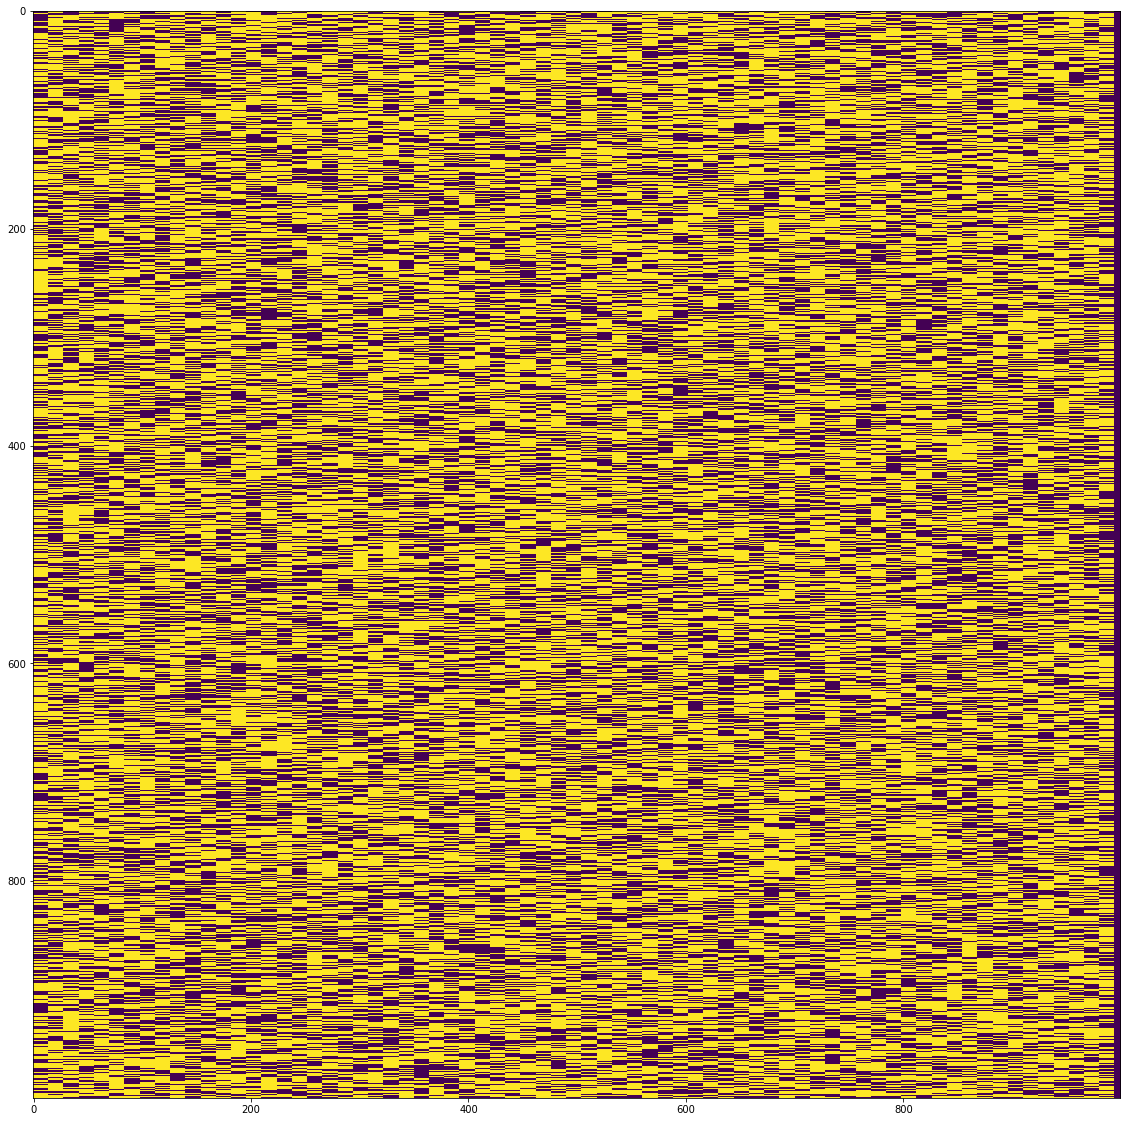

(1000, 1000)
574500.0


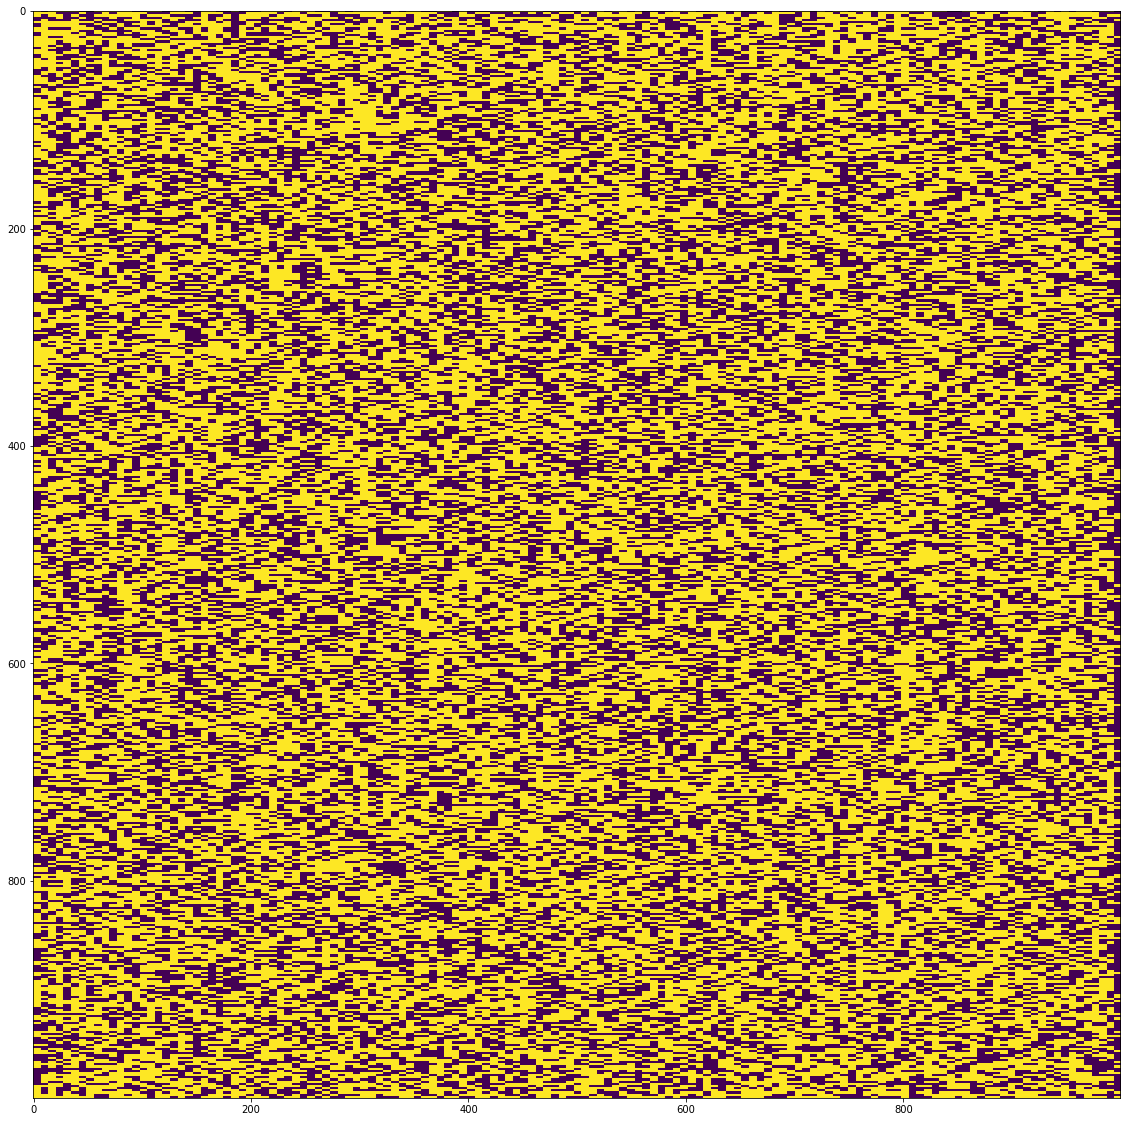

(1000, 1000)
225432.0


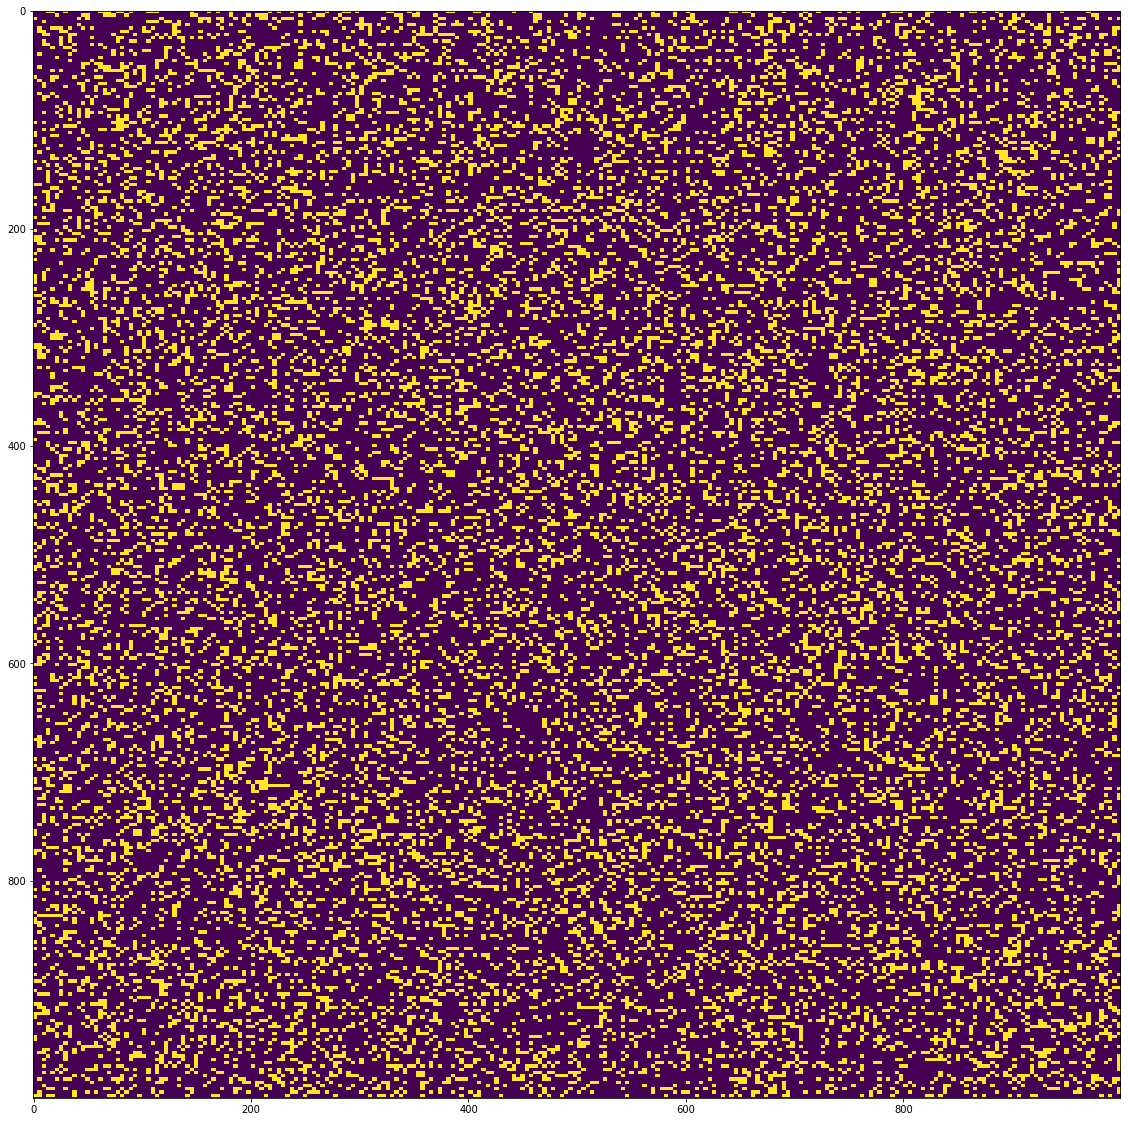

(1000, 1000)
225264.0


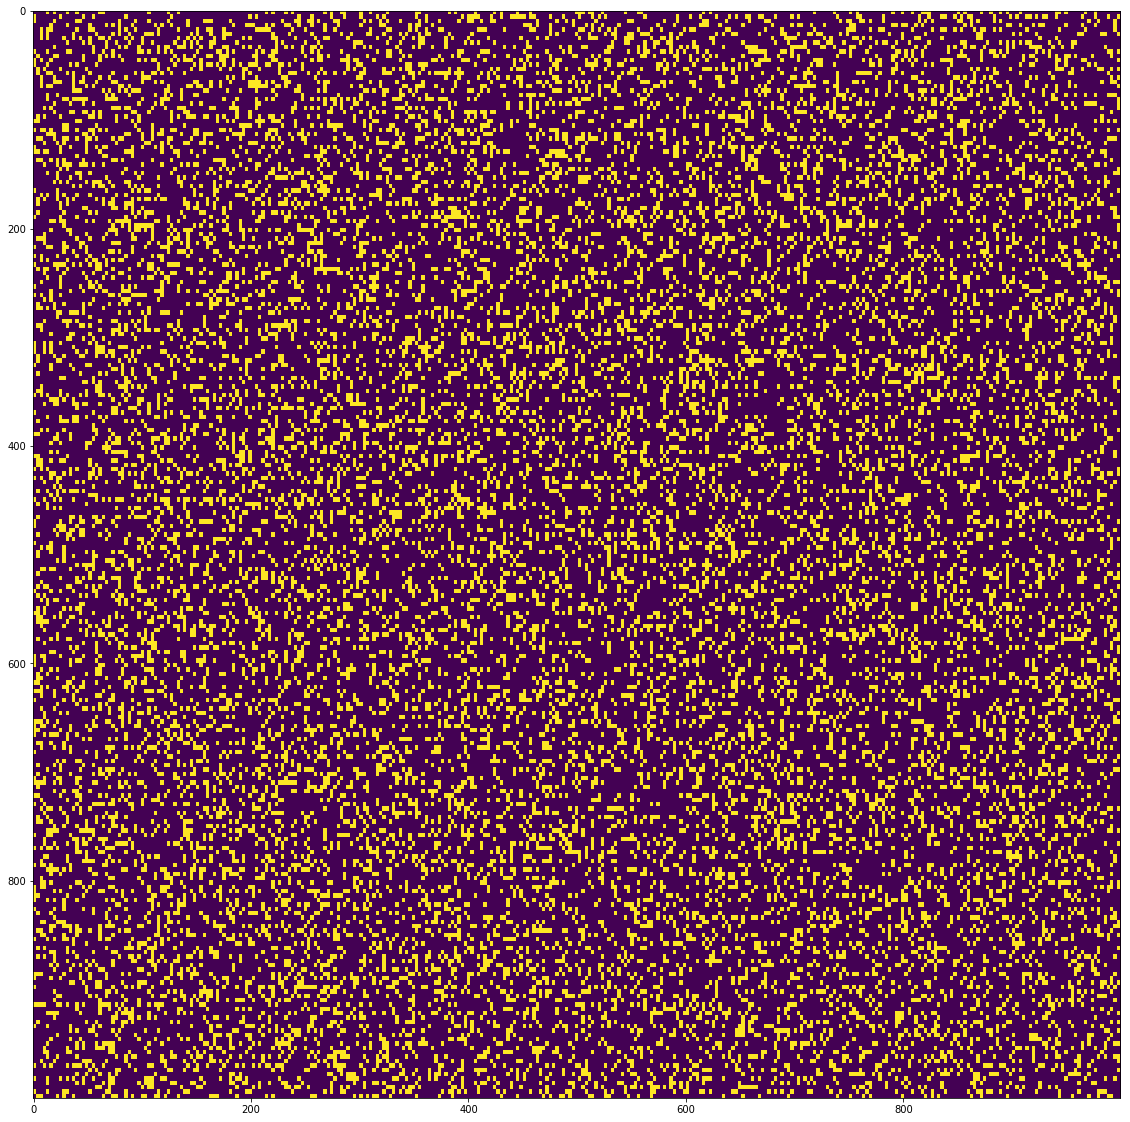

(1000, 1000)
573330.0


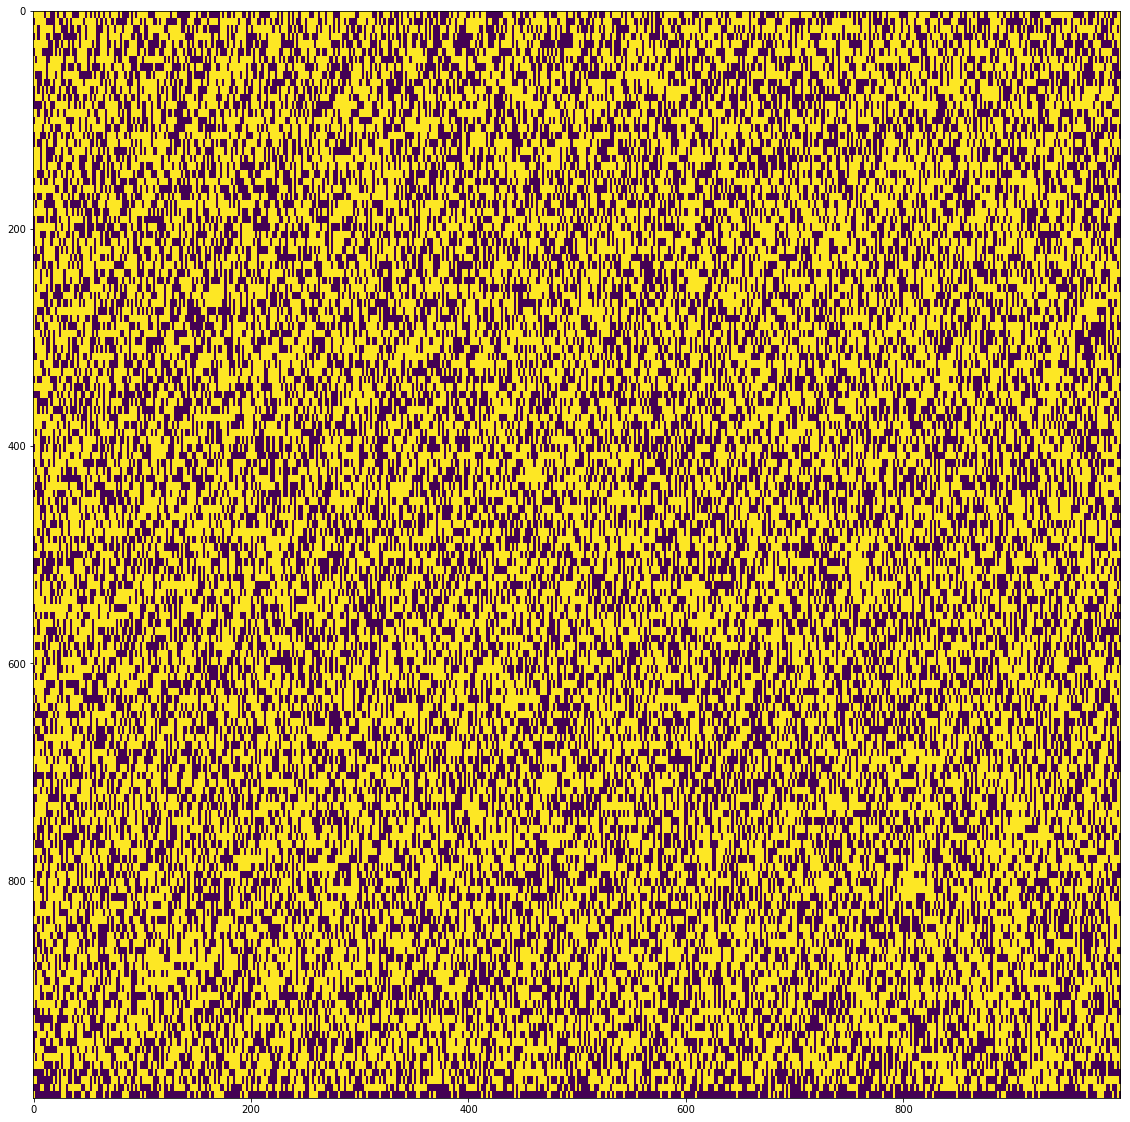

(1000, 1000)
573678.0


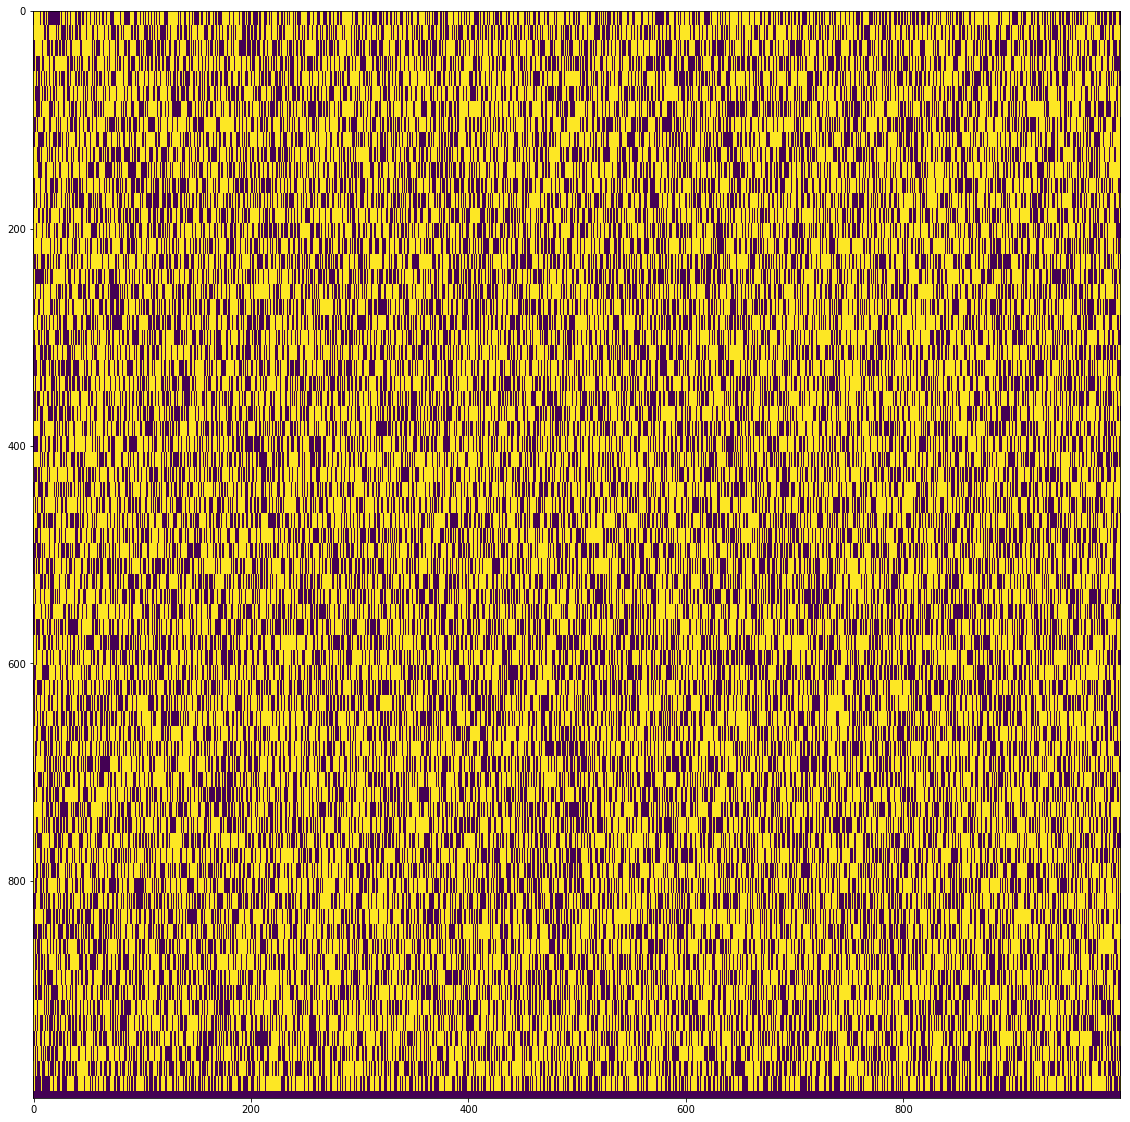

In [22]:
for x_max, y_max in find_all_sizes(area):
    taken, taken_matrix = run_algo(ingredients, area, pizza, x_max, y_max)
    print(np.sum(taken_matrix))
    plt.figure(figsize =(20,20))
    plt.imshow(np.transpose(taken_matrix))
    plt.show()

## Jerem Part ;)

In [94]:
val = np.array([[1,2,2,2],[1,2,2,2],[1,2,2,2],[1,2,2,2]])

In [95]:
val[1:-1,1:-1] = True

In [96]:
val

array([[1, 2, 2, 2],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 2, 2, 2]])

In [ ]:
from IPython import display
import time
def rec(mat, l, h):
    lt = 0
    lm = 0
    mask = np.ones(mat.shape)
    deb = np.array([0, 0])
    end = np.array([0, 0])
    total = 0
    while deb[0]+1 < mat.shape[0] or deb[1]+1 < mat.shape[1]:
        val, tot, end = add(mat, mask, deb, deb, lm, lt, l, h)
        if val:
            mask[deb[0]:end[0], deb[1]:end[1]] = 0
            plt.figure(figsize =(10,10))
            plt.imshow(mask)
            total += tot
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1.0)
            print '------> total : ' +str(total) + "  deb : " +str(deb) + " end : " +str(end)
        if deb[0]+1 < mat.shape[0]: deb[0] += 1
        else: deb = np.array([0,deb[1]+1])
    return mask, total

In [48]:
def add(mat, maska, deb, end, lm, lt, l, h):
    if maska[end[0],end[1]]:
        a = (end + np.array([1, 1])) - deb
        tot = a[0] * a[1]
       # print 'tot:' + str(tot) +', a : ' + str(a) + ', end : ' +str(end)
        if tot <= h:
            if mat[end[0],end[1]]:
                lt += 1
            else:
                lm += 1
            maska[end[0],end[1]]=0
            if lt >= l and lm >= l:
               # print 'ok'
                return True, tot, end
            else :
               # print 'no'
                if end[0]+1 < mat.shape[0]:
                    vala, tota, enda = add(mat, maska, deb, end+np.array([1,0]), lm, lt, l, h)
                    if vala: return True, tota, enda
                if end[1]+1 < mat.shape[1]:
                    valb, totb, endb = add(mat, maska, deb, end+np.array([0,1]), lm, lt, l, h)
                    if valb: return True, totb, endb
    return False, False, False

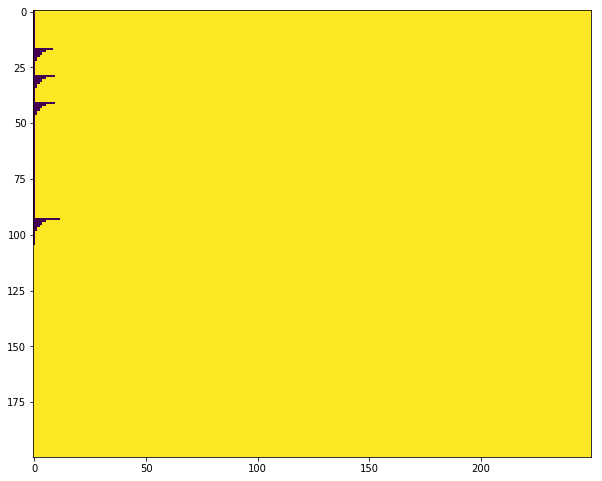

In [ ]:
mask, total = rec(pizza, ingredients, area)

In [37]:
print total

533765


In [142]:
print mask.any()

False


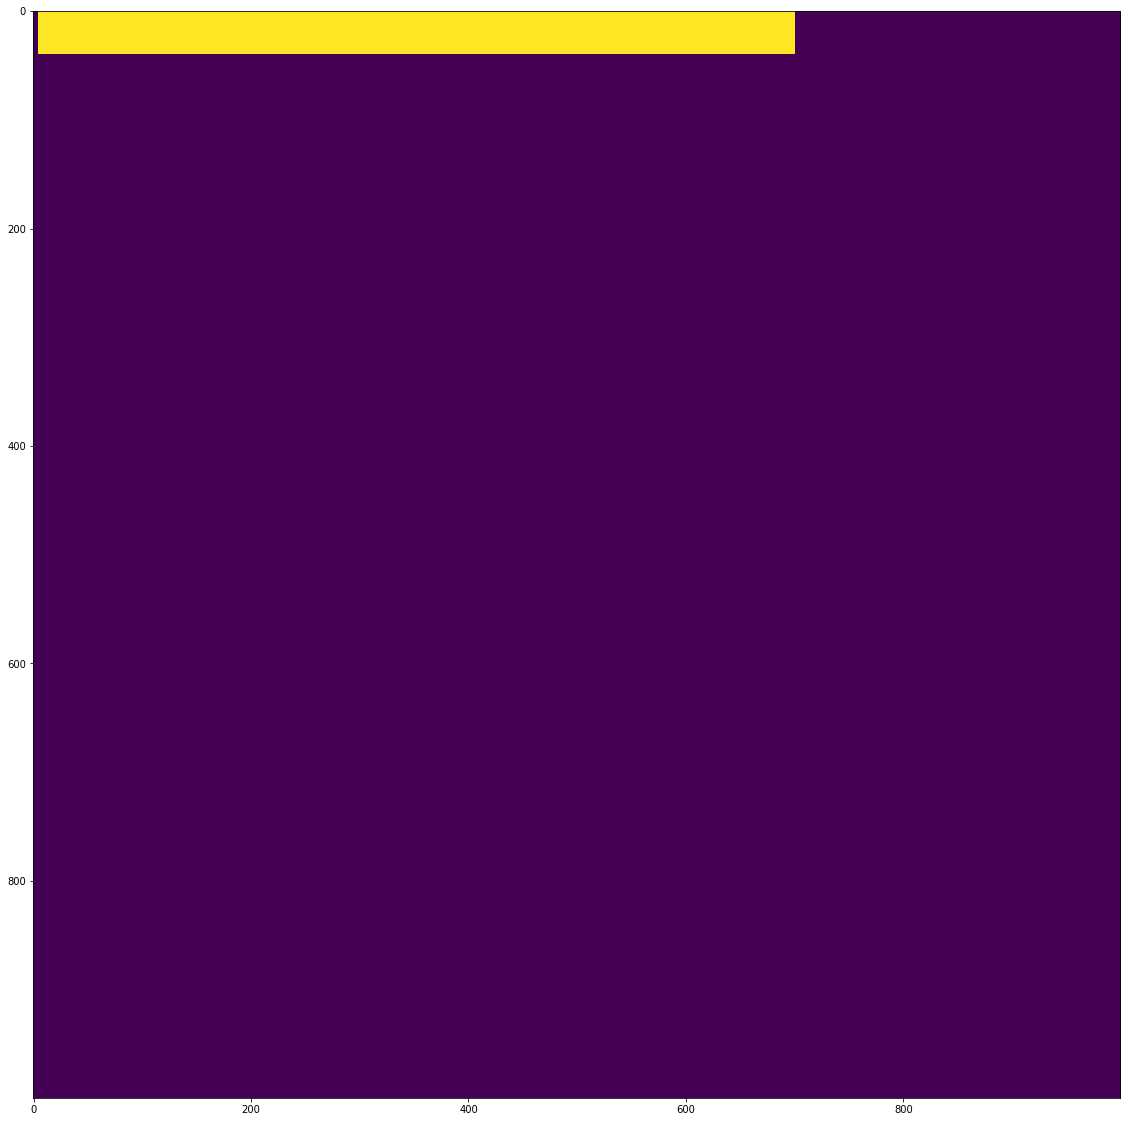

In [42]:
plt.figure(figsize =(20,20))
plt.imshow(mask)
#
plt.show()

In [75]:
print ingredients, area, pizza.shape

4 12 (200, 250)


In [109]:
end = np.array([1,0])

In [40]:
deb = np.array([1,5])
end = np.array([40,700])

In [41]:
mask[deb[0]:end[0], deb[1]:end[1]] = True